# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# Create the Urban Suburban and Rural city DataFrames
urban_city_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_city_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_city_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
#  1. Get the total rides for each city type
urban_ride_count_ds = urban_city_df.groupby(["city"])["ride_id"].count()
suburban_ride_count_ds = suburban_city_df.groupby(["city"])["ride_id"].count()
rural_ride_count_ds = rural_city_df.groupby(["city"])["ride_id"].count()

urban_total_rides = urban_ride_count_ds.sum()
suburban_total_rides = suburban_ride_count_ds.sum()
rural_total_rides = rural_ride_count_ds.sum()

print(urban_total_rides)
print(suburban_total_rides)
print(rural_total_rides)

1625
625
125


In [5]:
# 2. Get the total drivers for each city type
urban_driver_sum_ds = urban_city_df.groupby(["city"]).first()["driver_count"]
suburban_driver_sum_ds = suburban_city_df.groupby(["city"]).first()["driver_count"]
rural_driver_sum_ds = rural_city_df.groupby(["city"]).first()["driver_count"]

urban_total_drivers = urban_driver_sum_ds.sum()
suburban_total_drivers = suburban_driver_sum_ds.sum()
rural_total_drivers = rural_driver_sum_ds.sum()

#print(urban_driver_count_ds.head())

print(urban_total_drivers)
print(suburban_total_drivers)
print(rural_total_drivers)

2405
490
78


In [6]:
#  3. Get the total amount of fares for each city type
urban_fare_sum_ds = urban_city_df.groupby(["city"]).sum()["fare"]
suburban_fare_sum_ds = suburban_city_df.groupby(["city"]).sum()["fare"]
rural_fare_sum_ds = rural_city_df.groupby(["city"]).sum()["fare"]

urban_total_fares = urban_fare_sum_ds.sum()
suburban_total_fares = suburban_fare_sum_ds.sum()
rural_total_fares = rural_fare_sum_ds.sum()

print(urban_total_fares)
print(suburban_total_fares)
print(rural_total_fares)

39854.38000000001
19356.33
4327.93


In [7]:
#  4. Get the average fare per ride for each city type. 
urban_avg_ride_fare = urban_total_fares / urban_total_rides
suburban_avg_ride_fare = suburban_total_fares / suburban_total_rides
rural_avg_ride_fare = rural_total_fares / rural_total_rides

print(urban_avg_ride_fare)
print(suburban_avg_ride_fare)
print(rural_avg_ride_fare)

24.525772307692314
30.970128000000003
34.62344


In [8]:
# 5. Get the average fare per driver for each city type. 
urban_avg_driver_fare = urban_total_fares / urban_total_drivers
suburban_avg_driver_fare = suburban_total_fares / suburban_total_drivers
rural_avg_driver_fare = rural_total_fares / rural_total_drivers

print(urban_avg_driver_fare)
print(suburban_avg_driver_fare)
print(rural_avg_driver_fare)

16.57146777546778
39.50271428571429
55.48628205128205


In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
    {"Total Rides": [rural_total_rides, suburban_total_rides, urban_total_rides],
     "Total Drivers": [rural_total_drivers, suburban_total_drivers, urban_total_drivers],
     "Total Fares": [rural_total_fares, suburban_total_fares, urban_total_fares],
     "Average Fare per Ride": [rural_avg_ride_fare, suburban_avg_ride_fare, urban_avg_ride_fare],
     "Average Fare per Driver": [rural_avg_driver_fare, suburban_avg_driver_fare, urban_avg_driver_fare]})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,125,78,4327.93,34.623440,55.486282
1,625,490,19356.33,30.970128,39.502714
2,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,125,78,"$4,327.93",$34.62,$55.49
1,625,490,"$19,356.33",$30.97,$39.50
2,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# Check date types
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [14]:
# Convert "date" from object to "datetime" format
#pyber_data_df["date"] = pd.to_datetime(pyber_data_df["date"])
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_per_date_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
fares_per_date_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_per_date_df = fares_per_date_df.reset_index()
fares_per_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
table = fares_per_date_df.pivot(values="fare", index="date", columns="type")
table.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [18]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
table_new_df = table.loc['2019-01-01':'2019-04-29']
table_new_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [19]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
table_new_df.index = pd.to_datetime(table_new_df.index)
table_new_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [20]:
table_new_df.reset_index().sort_values("date").tail()

type,date,Rural,Suburban,Urban
2191,2019-04-28 14:28:36,NaN,NaN,11.46
2192,2019-04-28 16:29:16,NaN,NaN,36.42
2193,2019-04-28 17:26:52,NaN,NaN,31.43
2194,2019-04-28 17:38:09,NaN,34.87,NaN
2195,2019-04-28 19:35:03,NaN,16.96,NaN


In [21]:
# 7. Check that the datatype for the index is datetime using df.info()
table_new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [26]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_per_week_df = table_new_df.resample("W").sum()
fares_per_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [27]:
table_new_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


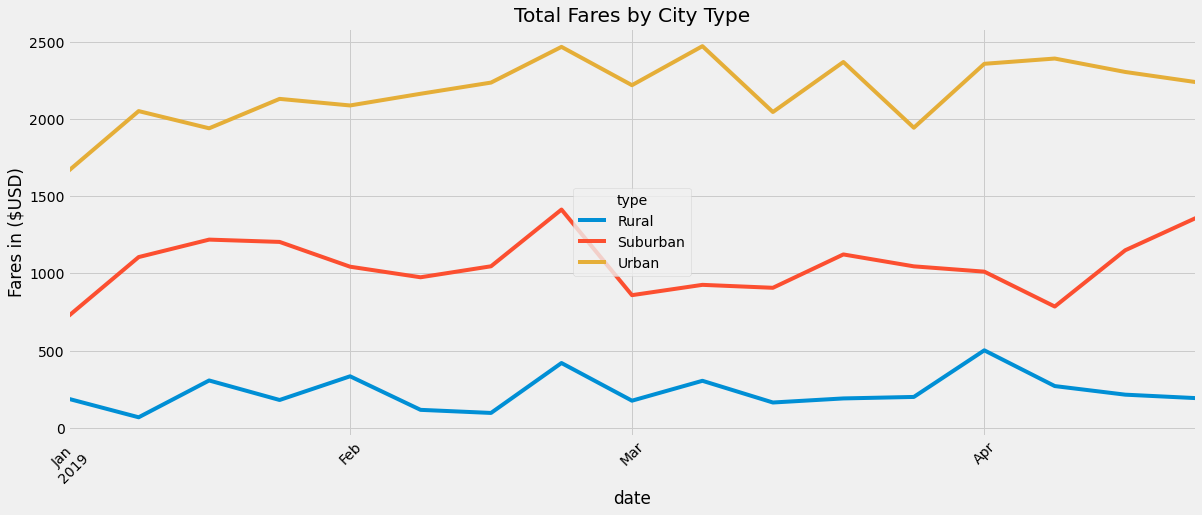

In [40]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


ax = fares_per_week_df.plot(figsize=(18,7))
ax.set_ylabel("Fares in ($USD)")
ax.set_title("Total Fares by City Type")
ax.tick_params(axis="x", labelrotation=45 )

fig.legend(["Rural","Suburban","Urban"])

plt.savefig("Resources/PyBer_fare_summary.png")